# Case 
Kita ingin mengetahui apakah penumpang dengan independent variable Pclass, Age, Sex, SibSp, Parch Embarked dari dataset Titanic survive atau tidak. Detail variabel bebas :
1. Pclass : tiket kelas
2. Age : Umur
3. Sex : Gender
4. SibSp : Jumlah saudara
5. Parch : Jumlah anak-anak
6. Embarked : Pemberangkatan

variabel terikatnya berarti Survived, karena kita ingin mengetahuinya.

# Langkah-langkah penyelesaian

### Import Common Package

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


### Data Exploration

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

### Check Missing Value

In [117]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

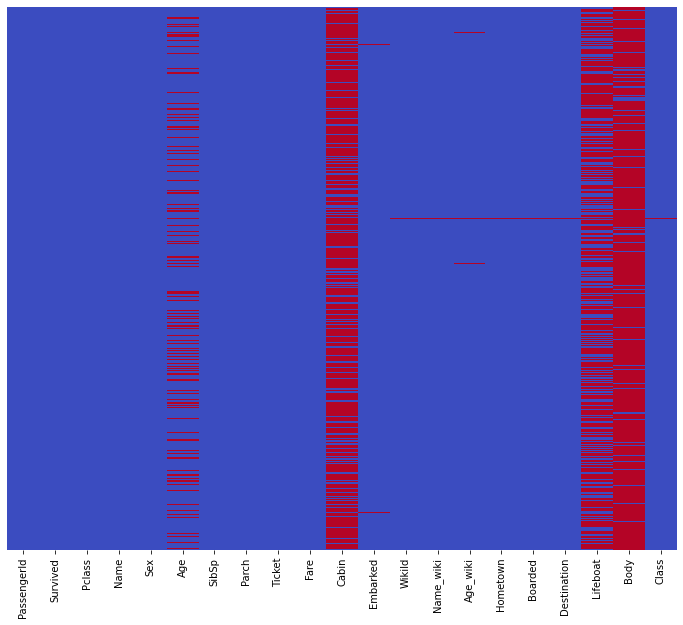

In [118]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.isna(), cmap='coolwarm', cbar=False, yticklabels=False)
plt.show() 
## mencari missing value menggunakan heatmap

### Pengecekan Imbalance (Distribusi data Target)
==> Hanya untuk Klasifikasi

In [119]:
df['Survived'].value_counts()

# 0 -> mokat
# 1 -> selamat

0.0    549
1.0    342
Name: Survived, dtype: int64

In [120]:
pd.crosstab(df['Survived'], columns='count', normalize=True)*100

col_0,count
Survived,
0.0,61.616162
1.0,38.383838


In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
WikiId,889.0,665.466817,380.796997,1.00,336.0000,672.0000,996.0,1314.0000
Age_wiki,887.0,29.322063,13.930089,0.42,20.0000,28.0000,38.0,74.0000
Class,889.0,2.307087,0.837713,1.00,2.0000,3.0000,3.0,3.0000


In [122]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body
count,891,891,891,204,889,889,889,889,889,345,87
unique,891,2,681,147,3,889,437,4,234,22,87
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,"Braund, Mr. Owen Harris","New York, New York, US",Southampton,New York City,15,175MB
freq,1,577,7,4,644,1,50,638,168,28,1


In [123]:
titanicDesc = []

for i in df.columns:
    titanicDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [124]:
pd.DataFrame(data = titanicDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,PassengerId,int64,0,0.00,891,"[179, 116]"
1,Survived,float64,0,0.00,2,"[1.0, 0.0]"
2,Pclass,int64,0,0.00,3,"[2, 3]"
3,Name,object,0,0.00,891,"[Jensen, Mr. Niels Peder, Christy, Miss. Julie..."
4,Sex,object,0,0.00,2,"[female, male]"
5,Age,float64,177,19.87,88,"[14.5, 45.0]"
6,SibSp,int64,0,0.00,7,"[3, 4]"
7,Parch,int64,0,0.00,7,"[1, 2]"
8,Ticket,object,0,0.00,681,"[SOTON/OQ 392090, 2631]"
9,Fare,float64,0,0.00,248,"[81.8583, 7.1417]"


# Quick EDA
- Digunakan untuk melakukan Feature Selection - Pemilihan Feature

### Domain - Knowledge
- Melakukan Feature selection berdasarkan domain Knowledge

In [125]:
df.drop(columns=['Body', 'Lifeboat'], inplace = True)
## Kita drop karena kolom ini memiliki pengaruh yang terlalu pasti/obvious terhadap target

In [126]:
## capstone module 3 harus bikin reason kaya gini nih buat kasitau gunanya buat apa

In [127]:
df.drop(columns=['Cabin', 'Class'], inplace = True)
## Kita drop karena kolom ini memiliki fungsi dan informasi yang sama dengan kolom Pclass
## Kita memilih menggunakan Pclass karena tidak terdapat Missing Value di kolom Pclass

In [128]:
## Feature Selection menggunakan EDA

### Buat Hipotesa Awal
- Pclass berpengaruh terhadap Survival Rates
- Sex - Gender berpengaruh terhadap survival rates
- Age/Usia berpengaruh terhadap survival rates
- SibSp (Sibling - Spouse) Berpengaruh terhadap Survival Rates
- Parch (Parent - Children) Berpengaruh terhadap Survival Rates
- Embarked - Boarded berpengaruh terhadap Survival Rates

### Cek Pclass

In [129]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [130]:
(df[['Pclass', 'Survived']].groupby('Pclass').mean()*100).round(2)

,Survived
Pclass,
1,62.96
2,47.28
3,24.24


In [131]:
## kenapa pake mean soalnya survived itu tipenya 0-1

- Pclass 1 memiliki Survival Rates paling tinggi => 62.96%
- Pclass berpengaruh terhadap Survival Rates

### Cek Sex

In [132]:
df[['Sex', 'Survived']].groupby('Sex').mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


- Sex - Female memiliki survival rates lebih tinggi => 74.2
- Sex berpengatuh terhadap survival rates

### Cek Age/Usia

- Melakukan Binning terhadap Age_Wiki (Usia) agar lebih mudah dianalisa

In [133]:
## Handling Missing Value - Fill Missing Value menggunakan rata-rata
df['Age_wiki'] = df['Age_wiki'].fillna(df['Age_wiki'].mean())

In [134]:
age_bin = [0, 10, 20, 40, df['Age_wiki'].max()] 
## membuat kelompok usia

In [135]:
labels = ['Kids', 'Teenager', 'Adult', 'Old'] 
## Membuat label untuk kelompok usia

In [136]:
df['age_bin'] = pd.cut(df['Age_wiki'], bins=age_bin, labels = labels)

In [137]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,age_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,Adult


In [138]:
df[['age_bin', 'Survived']].groupby('age_bin').mean()*100

,Survived
age_bin,
Kids,56.944444
Teenager,32.258065
Adult,37.931034
Old,37.426901


- Kelompok usia kids (0-10) memiliki survival rates paling tinggi di antara kelompok usia lain
- Age berpengaruh terhadap survival Rates

### Cek SibSp

In [139]:
(df[['SibSp','Survived']].groupby('SibSp').mean()*100).sort_values('Survived', ascending=False)

,Survived
SibSp,
1,53.588517
2,46.428571
0,34.539474
3,25.000000
4,16.666667
5,0.000000
8,0.000000


- 5 dan 8 mokat semua
- Jumlah sibling - Spouse berpengaruh terhadap survival rates, jumlah SibSp = 1 paling tinggi survival ratesnya 53.58%
- Jumlah SibSp dgn survival rates paling rendah adalah yg memiliki SibSp 5 keatas

### Cek ParCh

In [140]:
(df[['Parch','Survived']].groupby('Parch').mean()*100).sort_values('Survived', ascending = False)

,Survived
Parch,
3,60.000000
1,55.084746
2,50.000000
0,34.365782
5,20.000000
4,0.000000
6,0.000000


- Jumlah Parent - Children berpengaruh terhadap Survival Rates
- Jumlah ParCh 3 Survival Ratesnya paling tinggi >= 60%

### Cek Embarked - Boarder

In [141]:
(df[['Embarked','Survived']].groupby('Embarked').mean()*100).sort_values('Survived', ascending = False)

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


B tidak muncul karena merupakan NA

In [142]:
(df[['Boarded','Survived']].groupby('Boarded').mean()*100).sort_values('Survived', ascending = False)

,Survived
Boarded,
Cherbourg,56.024096
Queenstown,38.157895
Southampton,34.326019
Belfast,0.000000


- Embarked singkatan
- Boarded kepanjangan

In [143]:
## DataFrame for Train

In [144]:
df_1 = df[['Survived','Pclass','Sex','SibSp','Parch','Embarked','Age_wiki']]

In [145]:
df_1.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
Age_wiki    0
dtype: int64

In [146]:
## Handling NA

In [147]:
df_1['Embarked'].isna().sum()

2

In [148]:
df_1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [149]:
df_1['Embarked'] = df_1['Embarked'].fillna('S')
# isi NA dg S

In [150]:
df_1['Embarked'].isna().sum()

0

In [151]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_wiki
0,0.0,3,male,1,0,S,22.0
1,1.0,1,female,1,0,C,35.0
2,1.0,3,female,0,0,S,26.0
3,1.0,1,female,1,0,S,35.0
4,0.0,3,male,0,0,S,35.0


### Encoding

In [152]:
## Label
df_1['Sex'] = df_1['Sex'].map({
    'male' : 0,
    'female' : 1
})
# .map()

In [153]:
df_1 = pd.get_dummies(df_1, columns=['Embarked'])

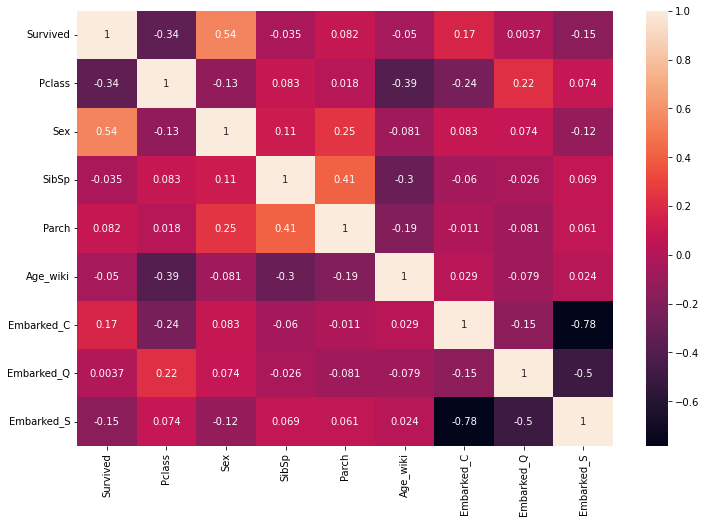

In [154]:
## Cek korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(), annot=True)
plt.show()
# pearson
# optional ajh karena kita sudah melakukan feature selection menggunakan EDA

karena jumlah features cukup sedikit karena kita sudah melakukan quick eda untk mengetahui pengaruh features terhadap target, sehingga sementara kita gunakan semua features meski korelasinya rendah

# ML - Modelling

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Splitting Data

In [156]:
X = df_1.drop(columns='Survived')
y = df_1['Survived'] # y=label/aktual

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = .80, stratify=y, random_state = 42)

- Train Test Split ketika kasus klasifikasi, harus gunakan parameter stratify untk labelnya agar ketika melakukan splitting bisa fair antara label/target/class
- Stratify khusus kasus klasifikasi, untuk linear tidak bisa

In [158]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
692,3,0,0,0,37.0,0,0,1
481,2,0,0,0,37.0,0,0,1
527,1,0,0,0,57.0,0,0,1
855,3,1,0,1,18.0,0,0,1
801,2,1,1,1,31.0,0,0,1


In [159]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
565,3,0,2,0,24.0,0,0,1
160,3,0,0,1,44.0,0,0,1
553,3,0,0,0,22.0,1,0,0
860,3,0,2,0,41.0,0,0,1
241,3,1,1,0,18.0,0,1,0


Model Training

In [160]:
model_LR = LogisticRegression()

In [161]:
model_LR.fit(X_train, y_train)

LogisticRegression()

## Evaluation Matrix
- Accuracy

In [162]:
model_LR.score(X_train, y_train)

0.8033707865168539

In [163]:
model_LR.score(X_test, y_test)

0.8100558659217877

In [164]:
model_LR.predict(X_train[:10])

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0.])

In [165]:
y_train[:10]

692    1.0
481    0.0
527    0.0
855    1.0
801    1.0
652    0.0
509    1.0
557    0.0
828    1.0
18     0.0
Name: Survived, dtype: float64

Note :

In [166]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [167]:
y_pred_tr = model_LR.predict(X_train)

In [168]:
accuracy_score(y_train, y_pred_tr)

0.8033707865168539

In [169]:
recall_score(y_train, y_pred_tr)

0.7106227106227107

In [170]:
precision_score(y_train, y_pred_tr)

0.7607843137254902

In [171]:
f1_score(y_train, y_pred_tr)

0.7348484848484848

In [172]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, F1

In [173]:
## Eva Matrix Training

In [288]:
LR_Acc_tr, LR_Rec_tr, LR_Prec_tr, LR_F1_tr = Eva_Matrix(model_LR, X_train, y_train)

In [289]:
## Eva Matrix testing

In [341]:
LR_Acc_ts, LR_Rec_ts, LR_Prec_ts, LR_F1_ts = Eva_Matrix(model_LR, X_test, y_test)

In [342]:
data_LR = {
    "LogReg Train " : [LR_Acc_tr, LR_Rec_tr, LR_Prec_tr, LR_F1_tr],
    "LogReg Test" : [LR_Acc_ts, LR_Rec_ts, LR_Prec_ts, LR_F1_ts]
}
pd.DataFrame(data_LR, index=["Accuracy","Recall","Precision","F1"])

,LogReg Train,LogReg Test
Accuracy,0.803371,0.810056
Recall,0.710623,0.681159
Precision,0.760784,0.796610
F1,0.734848,0.734375


In [292]:
def Eva_Matrix_Base_Class(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_train = Model.predict(X_train)
    Acc_train = accuracy_score(y_train, y_pred_train)
    Rec_train = recall_score(y_train, y_pred_train)
    Prec_train = precision_score(y_train, y_pred_train)
    F1_train = f1_score(y_train, y_pred_train)
    y_pred_test = Model.predict(X_test)
    Acc_test = accuracy_score(y_test, y_pred_test)
    Rec_test = recall_score(y_test, y_pred_test)
    Prec_test = precision_score(y_test, y_pred_test)
    F1_test = f1_score(y_test, y_pred_test)
    data_LR = {
    "LogReg Train " : [LR_Acc_tr, LR_Rec_tr, LR_Prec_tr, F1_train],
    "LogReg Test" : [LR_Acc_ts, LR_Rec_ts, LR_Prec_ts, F1_test]
}
    
    df_LR = pd.DataFrame(data_LR, index=["Accuracy","Recall","Precision","F1"])
    return df_LR

In [293]:
## Improvement Model

In [294]:
## 1. Melalui data

In [295]:
## Adding - modify feature

In [296]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,age_bin,title,isAlone,bin_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Adult,Mr,0,Murah
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",Adult,Mrs,0,Murah
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,Adult,Miss,1,Murah
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",Adult,Mrs,0,Murah
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,Adult,Mr,1,Murah


Melakukan ekstraksi dr kolom nama 'Mr'

In [297]:
nama = "Braund, Mr. Owen Harris"

In [298]:
nama.split(', ')

['Braund', 'Mr. Owen Harris']

In [299]:
nama.split(', ')[1]

'Mr. Owen Harris'

In [300]:
nama.split(', ')[1].split('.')[0]

'Mr'

In [301]:
df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0] )

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [302]:
df['title'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [303]:
df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

kita mau gabungin

In [304]:
def modif_title(x):
    if x in ['Mr','Miss','Mrs','Master']:
        return x
    else:
        return 'Other'

In [305]:
df['title'].apply(modif_title)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: title, Length: 891, dtype: object

In [306]:
df['title'] = df['title'].apply(modif_title)
# kita masukin

In [307]:
df['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: title, dtype: int64

In [308]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,age_bin,title,isAlone,bin_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Adult,Mr,0,Murah
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",Adult,Mrs,0,Murah
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,Adult,Miss,1,Murah
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",Adult,Mrs,0,Murah
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,Adult,Mr,1,Murah


In [309]:
df['isAlone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)

In [310]:
df['isAlone'] = df['isAlone'].astype('int')

In [311]:
df['Fare'].max()

512.3292

In [312]:
df['Fare'].min()

0.0

In [313]:
label_fare = ['Murah','Sedang','Mahal','Premium']

In [314]:
pd.cut(df['Fare'], bins=4, labels=label_fare)

0      Murah
1      Murah
2      Murah
3      Murah
4      Murah
       ...  
886    Murah
887    Murah
888    Murah
889    Murah
890    Murah
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Murah' < 'Sedang' < 'Mahal' < 'Premium']

In [315]:
df['bin_fare'] = pd.cut(df['Fare'], bins=4, labels=label_fare)

In [316]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
WikiId           2
Name_wiki        2
Age_wiki         0
Hometown         2
Boarded          2
Destination      2
age_bin          0
title            0
isAlone          0
bin_fare         0
dtype: int64

In [317]:
## Handling NA

In [318]:
df['Age_wiki'] = df['Age_wiki'].fillna(df['Age_wiki'].mean())

In [319]:
df['Embarked'] = df['Embarked'].fillna('S')

In [320]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'age_bin', 'title',
       'isAlone', 'bin_fare'],
      dtype='object')

In [321]:
## Feature Selection

In [322]:
df_2 = df[['Survived','Pclass','Sex','Embarked','title','isAlone',
          'bin_fare','age_bin']]

In [323]:
## Data Preparation

In [324]:
df_2.head()

,Survived,Pclass,Sex,Embarked,title,isAlone,bin_fare,age_bin
0,0.0,3,male,S,Mr,0,Murah,Adult
1,1.0,1,female,C,Mrs,0,Murah,Adult
2,1.0,3,female,S,Miss,1,Murah,Adult
3,1.0,1,female,S,Mrs,0,Murah,Adult
4,0.0,3,male,S,Mr,1,Murah,Adult


In [325]:
## Encoding

In [326]:
df_2['Sex'] = df_2['Sex'].map({'male' : 0, 'female' : 1})

In [327]:
df_2['bin_fare'] = df_2['bin_fare'].map({'Murah' : 0, 'Sedang' : 1, 'Mahal' : 2, 'Premium' : 3
})

In [328]:
df_2['age_bin'] = df_2['age_bin'].map({
    'Kids' : 0, 'Teenager' : 1, 'Adult' : 2, 'Old' : 3
})

In [329]:
df_2 = pd.get_dummies(df_2, columns=['Embarked', 'title'])
# udah dirunning

In [330]:
df_2.head()

,Survived,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
0,0.0,3,0,0,0,2,0,0,1,0,0,1,0,0
1,1.0,1,1,0,0,2,1,0,0,0,0,0,1,0
2,1.0,3,1,1,0,2,0,0,1,0,1,0,0,0
3,1.0,1,1,0,0,2,0,0,1,0,0,0,1,0
4,0.0,3,0,1,0,2,0,0,1,0,0,1,0,0


In [331]:
## Re-Modelling

In [332]:
## Splitting Data

In [333]:
X_2 = df_2.drop(columns='Survived')
y_2 = df_2['Survived']

In [334]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify = y_2, test_size=.20,
                                                           random_state=42)

In [335]:
X_train_2.head()

,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
692,3,0,1,0,2,0,0,1,0,0,1,0,0
481,2,0,1,0,2,0,0,1,0,0,1,0,0
527,1,0,1,1,3,0,0,1,0,0,1,0,0
855,3,1,0,0,1,0,0,1,0,0,0,1,0
801,2,1,0,0,2,0,0,1,0,0,0,1,0


In [336]:
X_train_2.shape

(712, 13)

In [337]:
X_test_2.shape

(179, 13)

In [338]:
model_LR2 = LogisticRegression()

In [343]:
df_LogReg2 = Eva_Matrix_Base_Class(model_LR2, X_train_2, X_test_2, y_train_2, y_test_2, "LogReg2")

In [344]:
df_LogReg2

,LogReg Train,LogReg Test
Accuracy,0.803371,0.810056
Recall,0.710623,0.681159
Precision,0.760784,0.796610
F1,0.763359,0.702290


In [227]:
## 2. Melalui Model Tuning dan ganti Algoritma

In [228]:
## 2.1 Tuning

In [229]:
## Penalty = l2 = Ridge

In [230]:
param_C = np.arange(0.01,5,0.01)

###### Notes :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Aturan Penalty :
    'none' : gk ada penalty
    'l2' : l2 penalty
    'l1' : l1 penalty
    'elasticnet' : l1 dan l2 kena penalty
- l1_ratio komposisi berapa berapa
- elasticnet -> regularizatio didalamya ada ridge+lasso, rationya disebut 'l1_ratio'
- r2 khusus regresi

In [231]:
def Manual_Tune(c, X_train, X_test, y_train, y_test, Model, Reg,slvr): # slvr algoritma yg dipake untk menurunkan solver/menghitung rumus
    train_acc = []                                                     # masing2 solver berpengaruh ke regularization, ngasih penalty ke slvr
    test_acc = []
    if Reg == 'elasticnet' :
        rat = 0.5
    else :
        rat = None
    
    for i in c:
        model_R = Model(C=i, penalty=Reg, solver=slvr, l1_ratio = rat)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        Acc_train = accuracy_score(y_train, y_pred_tr)
        train_acc.append(Acc_train)
        y_pred_ts = model_R.predict(X_test)
        Acc_test = accuracy_score(y_test, y_pred_ts)
        test_acc.append(Acc_test)
    return train_acc, test_acc

In [232]:
train_LR, test_LR = Manual_Tune(param_C, X_train, X_test, y_train, y_test, LogisticRegression,'l2','lbfgs')

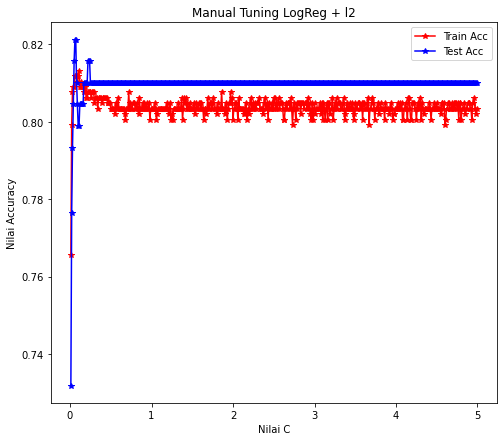

In [233]:
plt.figure(figsize=(8,7))
plt.plot(param_C, train_LR, 'r*-')
plt.plot(param_C, test_LR, 'b*-')
plt.legend(['Train Acc', 'Test Acc'])
plt.title('Manual Tuning LogReg + l2')
plt.xlabel('Nilai C')
plt.ylabel('Nilai Accuracy')
plt.show()

Artinya : Nilai akurasi paling bagus. Paling mendekati 1

In [348]:
train_LR_l1, test_LR_l1 = Manual_Tune(param_C, X_train, X_test, y_train, y_test, LogisticRegression,'l1','liblinear')

In [349]:
print('Max Accuracy :', np.max(test_LR_l1))

Max Accuracy : 0.8100558659217877


In [350]:
## Penalty (Regularization) = l1 = lasso

In [351]:
train_LR_l1, test_LR_l1 = Manual_Tune(param_C, X_train, X_test, y_train, y_test, LogisticRegression,'l1','liblinear')

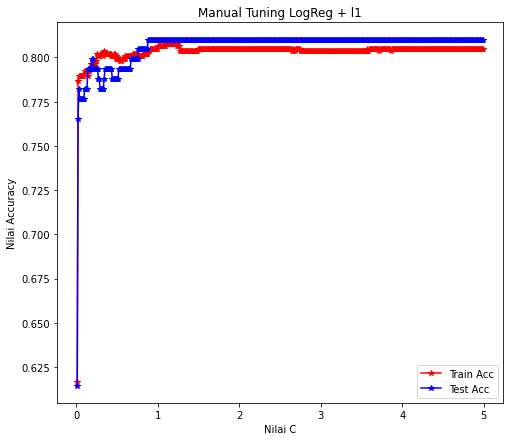

In [352]:
plt.figure(figsize=(8,7))
plt.plot(param_C, train_LR_l1, 'r*-')
plt.plot(param_C, test_LR_l1, 'b*-')
plt.legend(['Train Acc', 'Test Acc'])
plt.title('Manual Tuning LogReg + l1')
plt.xlabel('Nilai C')
plt.ylabel('Nilai Accuracy')
plt.show()

Artinya : Akurasi cumn sampe 0.8 sekian

In [353]:
print('Max Accuracy :', np.max(test_LR))

Max Accuracy : 0.8212290502793296


In [354]:
## (Regularization) - ElasticNet

In [355]:
train_LR_enet, test_LR_enet = Manual_Tune(param_C, X_train, X_test, 
                                          y_train, y_test, LogisticRegression,'elasticnet','saga')

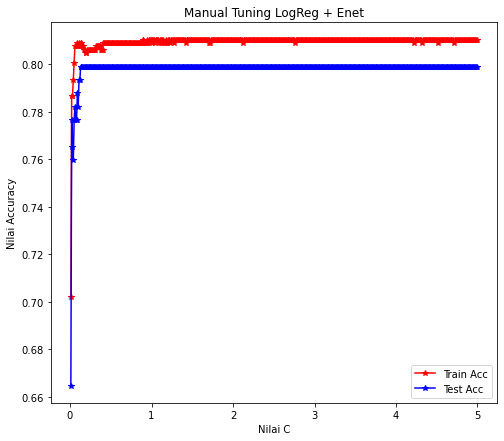

In [356]:
plt.figure(figsize=(8,7))
plt.plot(param_C, train_LR_enet, 'r*-')
plt.plot(param_C, test_LR_enet, 'b*-')
plt.legend(['Train Acc', 'Test Acc'])
plt.title('Manual Tuning LogReg + Enet')
plt.xlabel('Nilai C')
plt.ylabel('Nilai Accuracy')
plt.show()

In [357]:
print('Max Accuracy :', np.max(test_LR_enet))

Max Accuracy : 0.7988826815642458


In [358]:
## Fine Tuning

In [359]:
param_C_2 = np.arange(0.001,1,0.001)
# kita cek dibagian 0-1 lebih teliti, karena dirange tsb mengalami fluktuasi

In [360]:
train_LR_2, test_LR_2 = Manual_Tune(param_C_2, X_train, X_test, y_train, y_test, LogisticRegression,'l2','lbfgs')

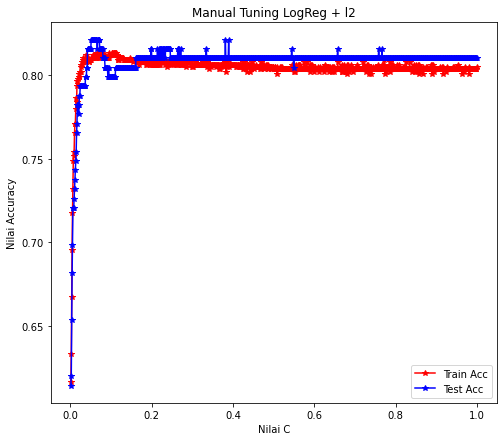

In [361]:
plt.figure(figsize=(8,7))
plt.plot(param_C_2, train_LR_2, 'r*-')
plt.plot(param_C_2, test_LR_2, 'b*-')
plt.legend(['Train Acc', 'Test Acc'])
plt.title('Manual Tuning LogReg + l2')
plt.xlabel('Nilai C')
plt.ylabel('Nilai Accuracy')
plt.show()

In [362]:
print('Max Accuracy :', np.max(test_LR_2))
print('C terbaik :',param_C_2[np.argmax(test_LR_2)])
best_C = param_C_2[np.argmax(test_LR_2)]

Max Accuracy : 0.8212290502793296
C terbaik : 0.051000000000000004


In [363]:
### Tuning 2

In [364]:
train_LR_3, test_LR_3 = Manual_Tune(param_C_2, X_train_2, X_test_2, y_train_2, y_test_2, LogisticRegression, 'l2', 'lbfgs')

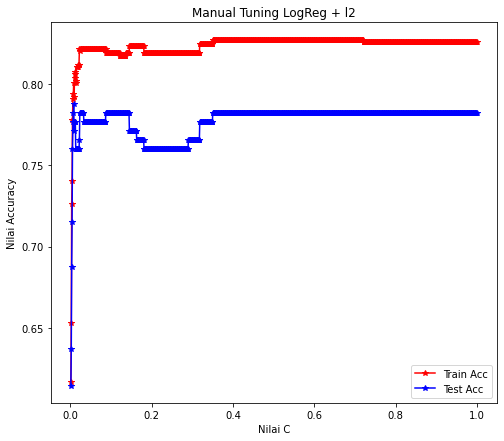

In [365]:
plt.figure(figsize=(8,7))
plt.plot(param_C_2, train_LR_3, 'r*-')
plt.plot(param_C_2, test_LR_3, 'b*-')
plt.legend(['Train Acc', 'Test Acc'])
plt.title("Manual Tuning LogReg + l2")
plt.xlabel("Nilai C")
plt.ylabel("Nilai Accuracy")
plt.show()

In [366]:
print('Max Accuracy : ', np.max(test_LR_3))

Max Accuracy :  0.7877094972067039


In [367]:
LR_Tuned = LogisticRegression(C=best_C)
LR_Tuned.fit(X_train, y_train)

LogisticRegression(C=0.051000000000000004)

In [368]:
## Confusion Matrix

In [369]:
from sklearn.metrics import confusion_matrix, classification_report

In [370]:
y_Log = LR_Tuned.predict(X_train)

In [371]:
print(classification_report(y_train, y_Log))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85       439
         1.0       0.81      0.66      0.73       273

    accuracy                           0.81       712
   macro avg       0.81      0.78      0.79       712
weighted avg       0.81      0.81      0.81       712



- 0 mokat
- 1 alive
- support -> jumlah
- macro avg rata-rata dari diatasnya
- weighted avg bc/ad

In [372]:
## Makin tinggi recall, makin kecil precision.

## Diagonal searah, horizontal dan vertikal terbalik.

In [373]:
cm_train = confusion_matrix(y_train, y_Log, labels=[1, 0])
cm_train

array([[179,  94],
       [ 41, 398]], dtype=int64)

In [374]:
df_train = pd.DataFrame(data = cm_train, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_train

,Pred 1,Pred 0
Akt 1,179,94
Akt 0,41,398


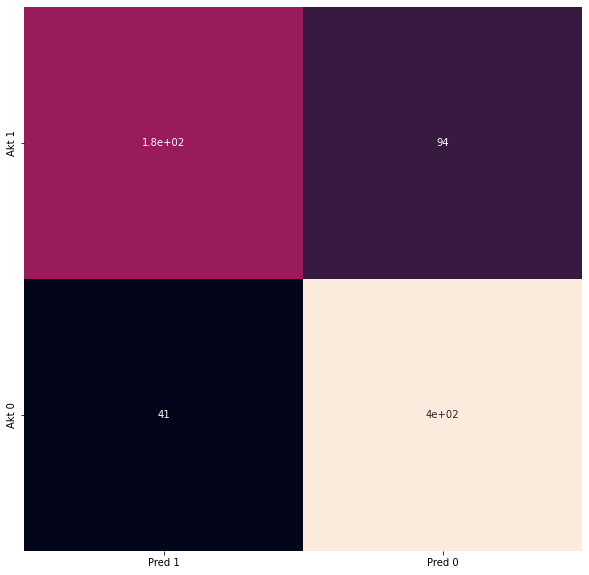

In [375]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train, annot=True, cbar=False)
plt.show()

In [376]:
## Test Set

In [377]:
y_Log_test = LR_Tuned.predict(X_test)

In [378]:
print(classification_report(y_test, y_Log_test))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87       110
         1.0       0.86      0.64      0.73        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.83      0.82      0.81       179



In [379]:
cm_test = confusion_matrix(y_test, y_Log_test, labels=[1, 0])
cm_test

array([[ 44,  25],
       [  7, 103]], dtype=int64)

In [380]:
df_test = pd.DataFrame(data = cm_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_test

,Pred 1,Pred 0
Akt 1,44,25
Akt 0,7,103


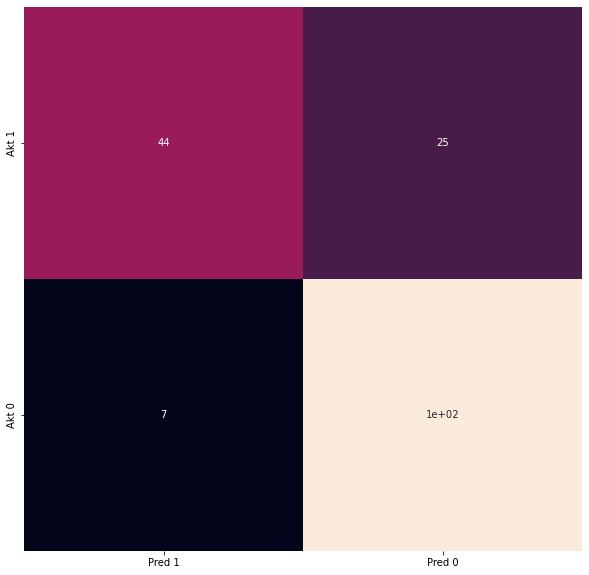

In [381]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_test, annot=True, cbar=False)
plt.show()